Some typical NumPy 'random' functions:

In [20]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.50659877 0.25298246]
 [0.02083268 0.61425964]
 [0.84948053 0.84500012]]
[-0.60250397 -0.74588173  0.66453261 -0.59549798  0.16233478]
[31  4 97 76 10 92 40 55 89 35]
[3 5 6]
[ 0.78182128  0.01752872 -1.07488564  0.32766239  0.55301809 -0.3208699
  1.95791418 -1.08543636  1.52505896  0.07699243]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [21]:
import pandas as pd
import time 

start_time_pandas = time.time()  
  
df_pandas = pd.DataFrame({'RandomNumbers': pd.np.random.randint(1, 101, size=1000000)})  
  
end_time_pandas = time.time()  
  
print(f"Time taken by pandas: {end_time_pandas - start_time_pandas} seconds")

Time taken by pandas: 0.007045745849609375 seconds


<ipython-input-21-b4194d067027>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_pandas = pd.DataFrame({'RandomNumbers': pd.np.random.randint(1, 101, size=1000000)})


In [22]:
  
# Start time measurement  
start_time_numpy = time.time()  
  
# Generate a 1D array of 1 million random integers between 1 and 100  
arr_numpy = np.random.randint(1, 101, size=1000000)  
  
# End time measurement  
end_time_numpy = time.time()  
  
# Print the time taken  
print(f"Time taken by NumPy: {end_time_numpy - start_time_numpy} seconds")

reason = end_time_pandas - start_time_pandas - end_time_numpy + start_time_numpy
if reason > 0:
    print("numpy is faster")
elif reason < 0:
    print("pandas is faster")
else :
    print("both")

Time taken by NumPy: 0.015958786010742188 seconds
pandas is faster


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [23]:
start_pandas = time.time()
df = pd.read_csv('sleep_health.csv')  
  
# Calculate means  
mean_sleep_duration = df['Sleep Duration'].mean()  
mean_systolic = df['Systolic blood pressure'].mean()  
mean_diastolic = df['Diastolic blood pressure'].mean()  
mean_heart_rate = df['Heart Rate'].mean()  
mean_daily_steps = df['Daily Steps'].mean()  

print(f"Mean Sleep Duration: {mean_sleep_duration}")  
print(f"Mean Systolic Blood Pressure: {mean_systolic}")  
print(f"Mean Diastolic Blood Pressure: {mean_diastolic}")  
print(f"Mean Heart Rate: {mean_heart_rate}")  
print(f"Mean Daily Steps: {mean_daily_steps}")

# Correlation across numerical variables  
corr_matrix = df.corr()  
  
# Specific correlations  
corr_sleep_age = corr_matrix.loc['Sleep Duration', 'Age']  
corr_sleep_heart_rate = corr_matrix.loc['Sleep Duration', 'Heart Rate']  
corr_sleep_daily_steps = corr_matrix.loc['Sleep Duration', 'Daily Steps']  
  
print(f"Correlation Sleep Duration and Age: {corr_sleep_age}")  
print(f"Correlation Sleep Duration and Heart Rate: {corr_sleep_heart_rate}")  
print(f"Correlation Sleep Duration and Daily Steps: {corr_sleep_daily_steps}")
end_pandas = time.time()

Mean Sleep Duration: 7.132085561497317
Mean Systolic Blood Pressure: 128.55347593582889
Mean Diastolic Blood Pressure: 84.64973262032086
Mean Heart Rate: 70.16577540106952
Mean Daily Steps: 6816.844919786096
Correlation Sleep Duration and Age: 0.34470935816474424
Correlation Sleep Duration and Heart Rate: -0.5164548885171435
Correlation Sleep Duration and Daily Steps: -0.039532537675731436


In [24]:
# Write your code for AIM #2 here
from scipy.stats import pearsonr \

start_numpy = time.time() 
# Loading the CSV file as an array in NumPy
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)


# Create separate arrays for the individual columns that you want to operate on
# For example, to create a separate array for 'Age' column
age = data['Age'].astype(int)
sleep_duration = data['Sleep_Duration'].astype(int)    
systolic = data['Systolic_blood_pressure'].astype(int)   
diastolic = data['Diastolic_blood_pressure'].astype(int)    
heart_rate = data['Heart_Rate'].astype(int)  
daily_steps = data['Daily_Steps'].astype(int) 


mean_sleep_duration_np = np.mean(sleep_duration)  
mean_systolic_np = np.mean(systolic)  
mean_diastolic_np = np.mean(diastolic)  
mean_heart_rate_np = np.mean(heart_rate)  
mean_daily_steps_np = np.mean(daily_steps)  
  
print(f"Mean Sleep Duration (NumPy): {mean_sleep_duration_np}")  


# Example for Sleep Duration and Age  
corr_sleep_age_np, _ = pearsonr(data['Sleep_Duration'], data['Age'])

print(f"Correlation Sleep Duration and Age (NumPy): {corr_sleep_age_np}")  
end_numpy = time.time()

total = end_pandas - start_pandas - end_numpy + start_numpy
if total > 0:
    print(f"numpy is faster,{end_numpy - start_numpy}")
elif total < 0:
    print(f"pandas is faster,{end_pandas - start_pandas}")
else :
    print("both")
# Calculate the correlation in NumPy using np.corrcoef()

# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]


# Use np-std() to calculate Standard deviation



Mean Sleep Duration (NumPy): 6.759358288770054
Correlation Sleep Duration and Age (NumPy): 0.3447093581647441
pandas is faster,0.012728214263916016


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

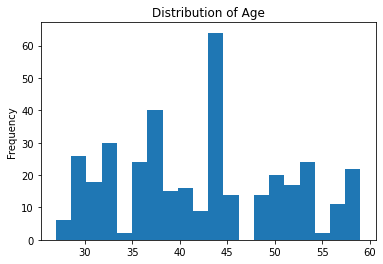

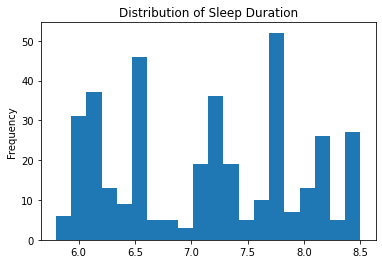

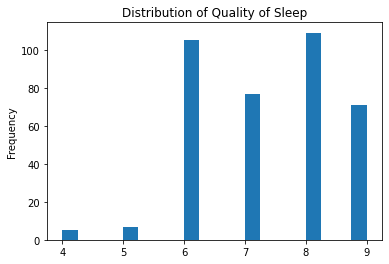

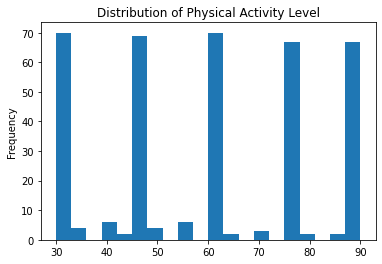

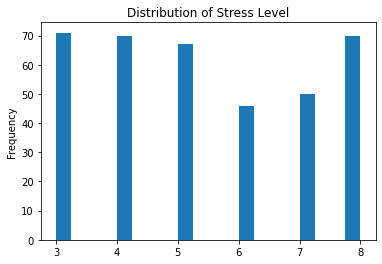

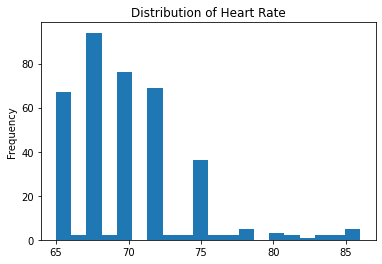

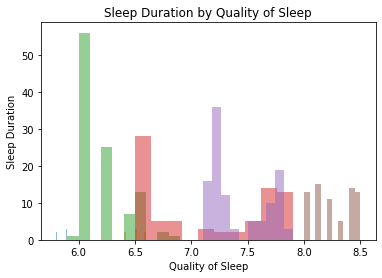

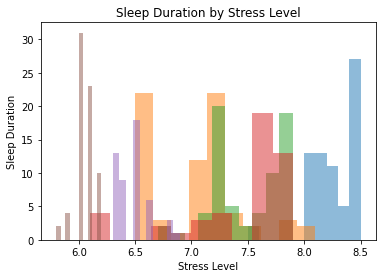

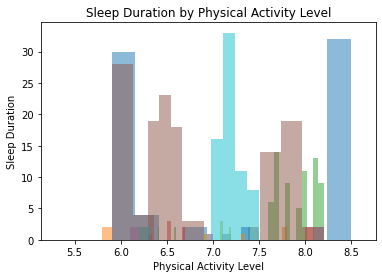

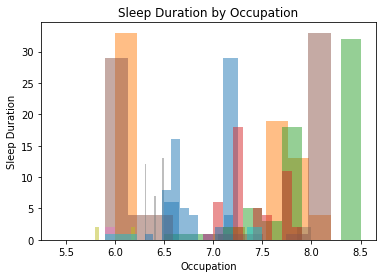

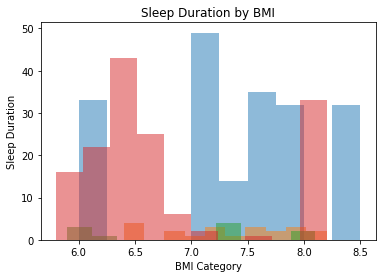

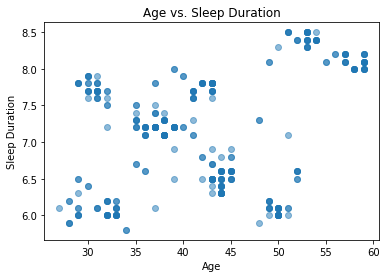

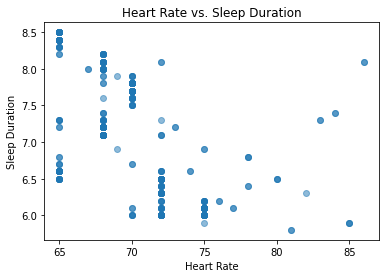

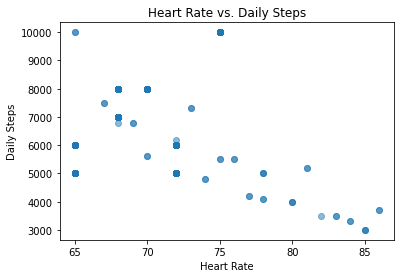

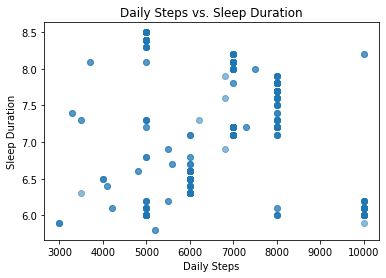

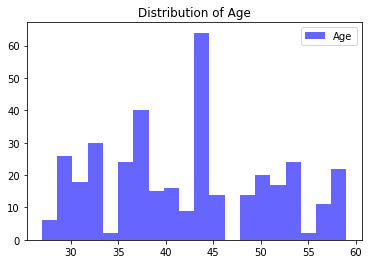

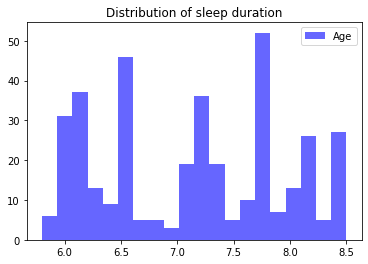

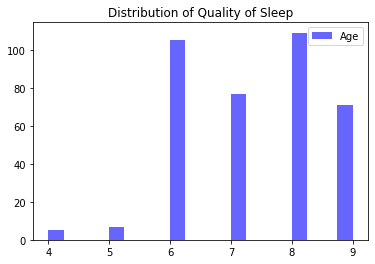

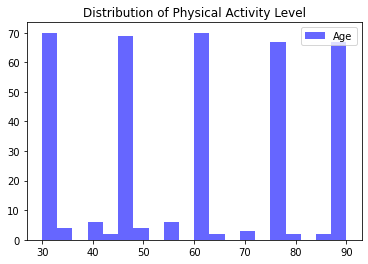

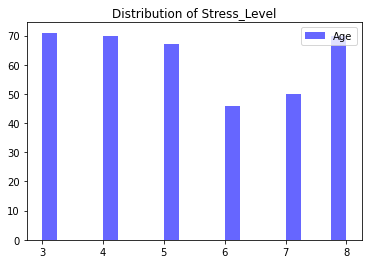

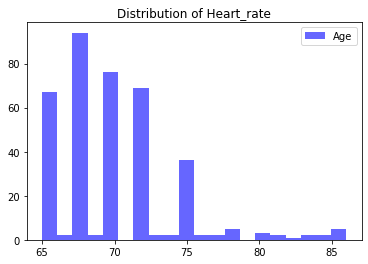

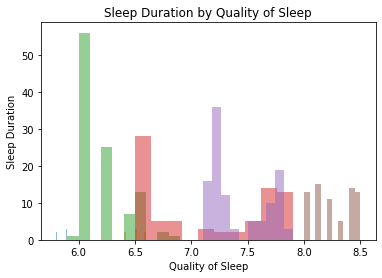

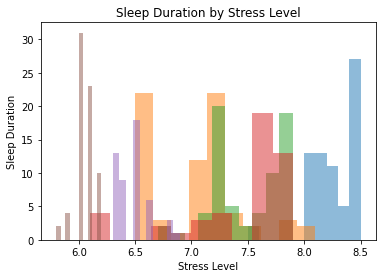

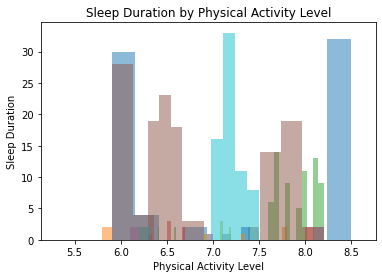

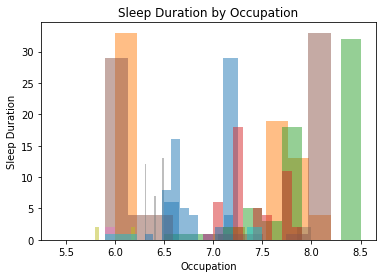

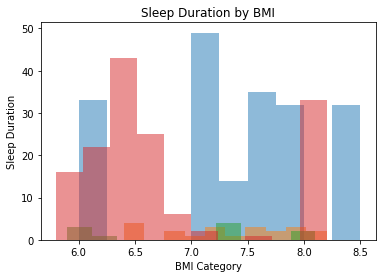

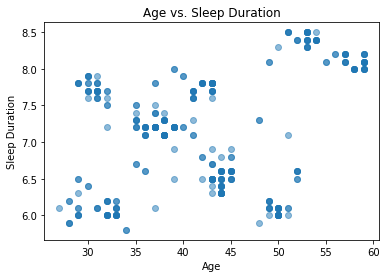

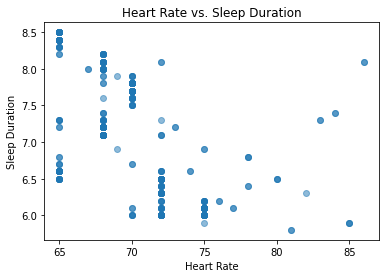

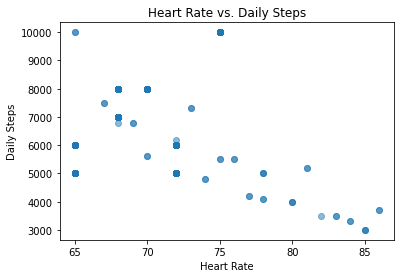

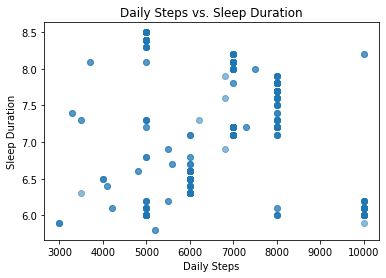

In [27]:
# Write your code for AIM #3 here
import matplotlib.pyplot as plt  
import seaborn as sns  


df['Age'].plot(kind='hist', bins=20, title='Distribution of Age')  
plt.show()  
  
# 1.2 Sleep Duration  
df['Sleep Duration'].plot(kind='hist', bins=20, title='Distribution of Sleep Duration')  
plt.show()  
  
# 1.3 Quality of Sleep  
df['Quality of Sleep'].plot(kind='hist', bins=20, title='Distribution of Quality of Sleep')  
plt.show()  
  
# 1.4 Physical Activity Level  
df['Physical Activity Level'].plot(kind='hist', bins=20, title='Distribution of Physical Activity Level')  
plt.show()  
  
# 1.5 Stress Level  
df['Stress Level'].plot(kind='hist', bins=20, title='Distribution of Stress Level')  
plt.show()  
  
# 1.6 Heart Rate  
df['Heart Rate'].plot(kind='hist', bins=20, title='Distribution of Heart Rate')  
plt.show()


df.groupby('Quality of Sleep')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by Quality of Sleep')  
plt.xlabel('Quality of Sleep')  
plt.ylabel('Sleep Duration')  
plt.show()  

df.groupby('Stress Level')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by Stress Level')  
plt.xlabel('Stress Level')  
plt.ylabel('Sleep Duration')  
plt.show()  

df.groupby('Physical Activity Level')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by Physical Activity Level')  
plt.xlabel('Physical Activity Level')  
plt.ylabel('Sleep Duration')  
plt.show()  

df.groupby('Occupation')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by Occupation')  
plt.xlabel('Occupation')  
plt.ylabel('Sleep Duration')  
plt.show()  

df.groupby('BMI Category')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by BMI')  
plt.xlabel('BMI Category')  
plt.ylabel('Sleep Duration')  
plt.show()  

 
plt.scatter(df['Age'], df['Sleep Duration'], alpha=0.5)  
plt.title('Age vs. Sleep Duration')  
plt.xlabel('Age')  
plt.ylabel('Sleep Duration')  
plt.show()  
  

plt.scatter(df['Heart Rate'], df['Sleep Duration'], alpha=0.5)  
plt.title('Heart Rate vs. Sleep Duration')  
plt.xlabel('Heart Rate')  
plt.ylabel('Sleep Duration')  
plt.show() 

plt.scatter(df['Heart Rate'], df['Daily Steps'], alpha=0.5)  
plt.title('Heart Rate vs. Daily Steps')  
plt.xlabel('Heart Rate')  
plt.ylabel('Daily Steps')  
plt.show() 

plt.scatter(df['Daily Steps'], df['Sleep Duration'], alpha=0.5)  
plt.title('Daily Steps vs. Sleep Duration')  
plt.xlabel('Daily Steps')  
plt.ylabel('Sleep Duration')  
plt.show() 





#numpy
age = df['Age'].values  
sleep_duration = df['Sleep Duration'].values  
Quality_of_Sleep = df['Quality of Sleep'].values 
Physical_Activity_Level = df['Physical Activity Level'].values
Stress_Level = df['Stress Level'].values
Heart_rate = df['Heart Rate'].values
Daily_Steps = df['Daily Steps'].values
  

plt.hist(age, bins=20, alpha=0.6, color='b', label='Age')  
plt.title('Distribution of Age')  
plt.legend()  
plt.show()  

plt.hist(sleep_duration, bins=20, alpha=0.6, color='b', label='Age')  
plt.title('Distribution of sleep duration')  
plt.legend()  
plt.show() 

plt.hist(Quality_of_Sleep, bins=20, alpha=0.6, color='b', label='Age')  
plt.title('Distribution of Quality of Sleep')  
plt.legend()  
plt.show() 

plt.hist(Physical_Activity_Level, bins=20, alpha=0.6, color='b', label='Age')  
plt.title('Distribution of Physical Activity Level')  
plt.legend()  
plt.show() 

plt.hist(Stress_Level, bins=20, alpha=0.6, color='b', label='Age')  
plt.title('Distribution of Stress_Level')  
plt.legend()  
plt.show() 

plt.hist(Heart_rate, bins=20, alpha=0.6, color='b', label='Age')  
plt.title('Distribution of Heart_rate')  
plt.legend()  
plt.show()


df.groupby('Quality of Sleep')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by Quality of Sleep')  
plt.xlabel('Quality of Sleep')  
plt.ylabel('Sleep Duration')  
plt.show()  

df.groupby('Stress Level')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by Stress Level')  
plt.xlabel('Stress Level')  
plt.ylabel('Sleep Duration')  
plt.show()  

df.groupby('Physical Activity Level')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by Physical Activity Level')  
plt.xlabel('Physical Activity Level')  
plt.ylabel('Sleep Duration')  
plt.show()  

df.groupby('Occupation')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by Occupation')  
plt.xlabel('Occupation')  
plt.ylabel('Sleep Duration')  
plt.show()  

df.groupby('BMI Category')['Sleep Duration'].plot(kind='hist', alpha=0.5, title='Sleep Duration by BMI')  
plt.xlabel('BMI Category')  
plt.ylabel('Sleep Duration')  
plt.show()  

plt.scatter(age, sleep_duration, alpha=0.5)  
plt.title('Age vs. Sleep Duration')  
plt.xlabel('Age')  
plt.ylabel('Sleep Duration')  
plt.show()  
  

plt.scatter(Heart_rate,sleep_duration, alpha=0.5)  
plt.title('Heart Rate vs. Sleep Duration')  
plt.xlabel('Heart Rate')  
plt.ylabel('Sleep Duration')  
plt.show() 

plt.scatter(Heart_rate,Daily_Steps, alpha=0.5)  
plt.title('Heart Rate vs. Daily Steps')  
plt.xlabel('Heart Rate')  
plt.ylabel('Daily Steps')  
plt.show() 

plt.scatter(Daily_Steps,sleep_duration, alpha=0.5)  
plt.title('Daily Steps vs. Sleep Duration')  
plt.xlabel('Daily Steps')  
plt.ylabel('Sleep Duration')  
plt.show() 





  


#To count unique values and their total count in a NumPy array, use 
# np.unique(array_name, return_counts=True)--- This will return two values, one is the unique values and the other is the total count of each unique value
# You will need this for plotting bar plots




# For box plots in NumPy you will need to 
# create a list of variable1, grouped by the unique value of some variable2 (nominal or ordinal), 
# Syntax: variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

